<a href="https://colab.research.google.com/github/EmamulHossen/Feature-Transformation/blob/main/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Required Library**

In [5]:
import pandas as pd
import numpy as np

In [11]:
#Loading the Dataset
df=pd.read_csv('/content/drive/MyDrive/Data/Assignment.csv')

In [ ]:
df

,Price
0,110
1,105
2,115
3,120
4,110
5,130
6,150
7,100
8,105


# **Exploratory Data Analysis**

In [7]:
#Statistical Summary
df.describe()

,Price
count,9.000000
mean,116.111111
std,15.567951
min,100.000000
25%,105.000000
50%,110.000000
75%,120.000000
max,150.000000


# **Normalization**
Normalization is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale. It is not necessary for all datasets in a model. It is required only when features of machine learning models have different ranges

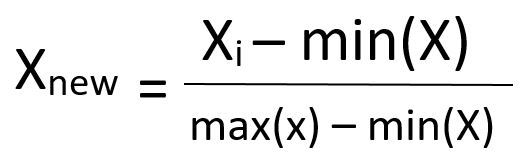

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler()

In [ ]:
Normalized_value=scaler.fit_transform(df)

In [ ]:
Normalized_value

array([[0.2],
       [0.1],
       [0.3],
       [0.4],
       [0.2],
       [0.6],
       [1. ],
       [0. ],
       [0.1]])

# **Manually**

In [5]:
#The column convert to  numpy array
x=df["Price"].to_numpy()

In [6]:
x

array([110, 105, 115, 120, 110, 130, 150, 100, 105])

In [7]:
x_new=(x-x.min())/(x.max()-x.min())

In [8]:
x_new

array([0.2, 0.1, 0.3, 0.4, 0.2, 0.6, 1. , 0. , 0.1])

# **Standardization**
Down Scaling the Values to a scale common to all, usually in the range -1 to +1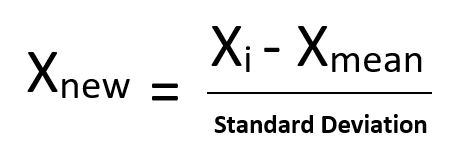

In [ ]:
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()
standard_value=scaler.fit_transform(df)

In [ ]:
standard_value

array([[-0.41635614],
       [-0.75701116],
       [-0.07570112],
       [ 0.26495391],
       [-0.41635614],
       [ 0.94626396],
       [ 2.30888405],
       [-1.09766619],
       [-0.75701116]])

# **Manually**

In [18]:
#The Column(Price) convert to numpy array
y=df["Price"].to_numpy()

In [10]:
y

array([110, 105, 115, 120, 110, 130, 150, 100, 105])

In [11]:
#Calculating Standard Deviation
sd=y.std()

In [12]:
sd

14.677605348469895

In [13]:
#Calculating Mean
mn=y.mean()

In [14]:
mn

116.11111111111111

In [15]:
#Stanardization
x_new=(y-mn)/(sd)

In [16]:
x_new

array([-0.41635614, -0.75701116, -0.07570112,  0.26495391, -0.41635614,
        0.94626396,  2.30888405, -1.09766619, -0.75701116])

# **Logarithm(log) Transformation**
>Log transformation means replacing each value with logarithm value.



In [10]:
log_trans=np.log10(df)

In [22]:
log_trans

,Price
0,2.041393
1,2.021189
2,2.060698
3,2.079181
4,2.041393
5,2.113943
6,2.176091
7,2.000000
8,2.021189


# **Max Absolute Scaler**
---
> The MaxAbsScaler is a type of feature scaling used to transform features by scaling them to a [-1, 1] range while preserving the relative relationships between data points.
---
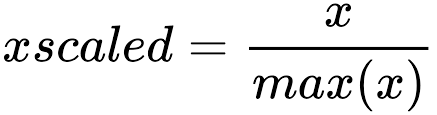





In [12]:
from sklearn.preprocessing import MaxAbsScaler

In [13]:
#Creating Object
scaler=MaxAbsScaler()

In [15]:
X_new=scaler.fit_transform(df[["Price"]])

In [16]:
X_new

array([[0.73333333],
       [0.7       ],
       [0.76666667],
       [0.8       ],
       [0.73333333],
       [0.86666667],
       [1.        ],
       [0.66666667],
       [0.7       ]])

# **Manually**

In [19]:
y

array([110, 105, 115, 120, 110, 130, 150, 100, 105])

In [20]:
#Slect Maximum Value
max_value=y.max()

In [21]:
max_value

150

In [22]:
#Calculating MaxAbsScaler
x_newValue=(y/max_value)

In [23]:
x_newValue

array([0.73333333, 0.7       , 0.76666667, 0.8       , 0.73333333,
       0.86666667, 1.        , 0.66666667, 0.7       ])

# **Robust Scaler**
---
> The RobustScaler is a type of feature scaling that's useful when your data contains outliers. It scales features using statistics that are robust to outliers, specifically by subtracting the median and dividing by the interquartile range (IQR). This helps to minimize the impact of outliers on the scaling process.
---
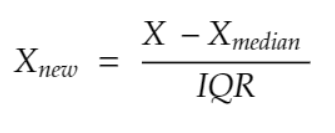





In [24]:
from sklearn.preprocessing import RobustScaler

In [25]:
#Creating Object
scaler=RobustScaler()

In [26]:
x_new=scaler.fit_transform(df[["Price"]])

In [27]:
x_new

array([[ 0.        ],
       [-0.33333333],
       [ 0.33333333],
       [ 0.66666667],
       [ 0.        ],
       [ 1.33333333],
       [ 2.66666667],
       [-0.66666667],
       [-0.33333333]])

# **Manually**

In [28]:
y

array([110, 105, 115, 120, 110, 130, 150, 100, 105])

In [30]:
#Calculating Q1
Q1=np.percentile(y,25)

In [31]:
print(Q1)

105.0


In [32]:
#Calculating Q2
Q2=np.percentile(y,50)

In [33]:
Q2

110.0

In [34]:
#Calculating Q3
Q3=np.percentile(y,75)

In [35]:
Q3

120.0

In [36]:
#Calculating Robust Scaler
x_newValue=(y-Q2)/(Q3-Q1)

In [37]:
x_newValue

array([ 0.        , -0.33333333,  0.33333333,  0.66666667,  0.        ,
        1.33333333,  2.66666667, -0.66666667, -0.33333333])